# Overfitting in Decision Tree

## Prerequisites
To start with overfitting in the case of Decision Tree, you must have an understanding of:

- Working of the decision tree (Decision Tree)

- Concept of overfitting, underfitting, bias, and variance (Regularization)
- Regularization and its types (Regularization)


## Learning Objective
- Explain the cause of overfitting in the decision tree.

- Interpret and visualize the decision surface of an overfitted decision tree.
- Analyze how noise causes the decision tree to go unnecessarily deep.
- Understand and apply Occum's Razor principle to identify the optimal depth of the decision tree.
- List techniques to prevent overfitting in the decision tree.





In regularization, we talked about overfitting, underfitting, regularization, and its type in the context of linear and logistic regression. These concepts do apply to other machine learning algorithms too. In this chapter, we will talk about them in the context of the decision tree. In the decision tree, we split nodes until all of them are pure. This results in a very deep tree. In other words, we can say that each splitting increases the complexity of the tree. And we already know that complexity of machine learning algorithms leads to overfitting. Thus, in this chapter, we will talk overfitting in the decision tree, reasons behind overfitting, and some measures to handle overfitting in the decision tree.



__Decision tree is highly prone to overfitting. But how?__

Unless we apply some early stopping or pruning techniques, decision trees are highly prone to overfitting. We will talk about early stopping and pruning techniques later.


We will justify that the decision tree is highly prone to overfitting with the help of following figure.



<figure>
<div align = "center">
<!-- <img src="https://doc.google.com/a/fusemachines.com/uc?id=1qDao7uPKu1-NyLgrRRZ2USXdMDeeKTXl" width="300" height="250"> -->
<img src="https://i.postimg.cc/hGVcQhvB/sample-size-reduction.png" width="300" height="250">

</div>
<div align = "center">
<figcaption>Figure 1: Decision tree with thickness of edge representing the fraction of samples available while making split.<figcaption>
</div>
</figure>


The figure above shows a tree with decreasing thickness of branch at each depth. Here the thickness represents the number of samples(subset) considered while making the split in a decision tree. In the decision tree, all training samples are considered while making a split at the root node. And we know that the decision based on a large amount of data is robust. Once a split is made at the root node, samples are divided into the child nodes. Each child node receives a subset of samples, and the decision(split) made based on these subsets is not robust as made based on whole training samples. While going deeper, the size of samples at each node decreases. The decision(split) based on a small subset is specific to the local pattern present in those subsets. So the decisions, at the deeper part of the tree, based on the local patterns in a subset of data, cause overfitting in the decision tree.






We will demonstrate overfitting in a decision tree with the help of a synthetic dataset. The synthetic dataset is generated using [make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) from sklearn. The synthetic dataset contains 100 samples each with two features. The sole purpose for using just two features is an ease of visualization.

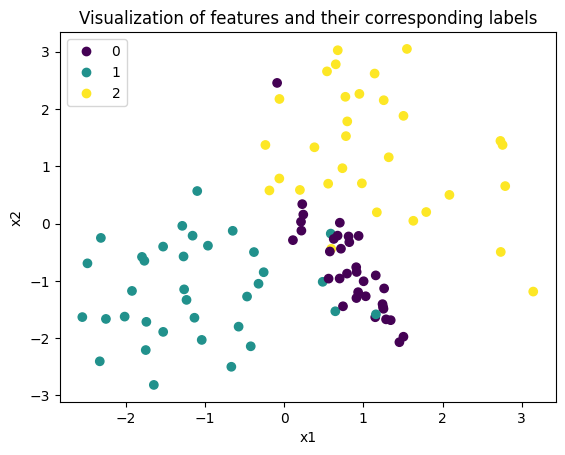

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt


# Synthetic dataset: 100 data points with 2 features each belonging to 3 classes
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_classes = 3, random_state = 10,
                           flip_y = 0.02, class_sep = 1, n_clusters_per_class = 1)
scatter = plt.scatter(X[:,0],X[:, 1], c = y)
plt.legend(*scatter.legend_elements(), loc = 2)
plt.title("Visualization of features and their corresponding labels")
plt.xlabel("x1")
plt.ylabel('x2')
plt.show()


We will fit a decision tree using sklearn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on the above data. Before we proceed any further, let's see some of the important parameters in DecisionTreeClassifier.

1. __max_depth__ [default= None]:

 Maximum depth of the tree. If none, the nodes are expanded until all leaves are pure or contain less than min_samples_split samples.

2. __min_samples_split__ [default=2]:

 Minimum number of sampes required to split an internal node.

3. __min_impurity_decrease__ [default= 0.0]:

 Minimum decrease in impurity in a node to create a split.


You can find the details of all parameters and their default values in [Sklearn's official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Now let's fit a decision tree on the synthetic dataset discussed above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

# Decision Tree Classifier
clff = DecisionTreeClassifier(random_state = 12)
clff.fit(X_train, y_train)
print(clff)

print("Training")
print("Accuracy:", accuracy_score(y_train, clff.predict(X_train)))

print("Test")
print("Accuracy",accuracy_score(y_test, clff.predict(X_test)))


DecisionTreeClassifier(random_state=12)
Training
Accuracy: 1.0
Test
Accuracy 0.75


As you can see, the training accuracy is perfect. In contrast, the test accuracy is only 75%; we can state that the decision tree is not generalizing properly and is overfitting the training data.

__Note: We considered only the accuracy as an evaluation metric because the dataset is pretty balanced.__

### Deep Tree Overfits

The complexity of a decision tree increases with the increase in depth. The complexity of a decision tree can also be expressed in terms of the number of nodes.
$$\textbf{Number of nodes} = 2^{\textbf{depth}+1}-1$$


With an increase in complexity, the decision tree starts to overfit.
Let's see, with implementation, how the decision tree tends to overfit with depth. For illustration, we will train trees with depth from 1 to 15 and compare their performance and plot the accuracy of the decision tree at different depths. As discussed above, the depth in sklearn's `DecisionTreeClassifier()` is controlled by the max_depth parameter.



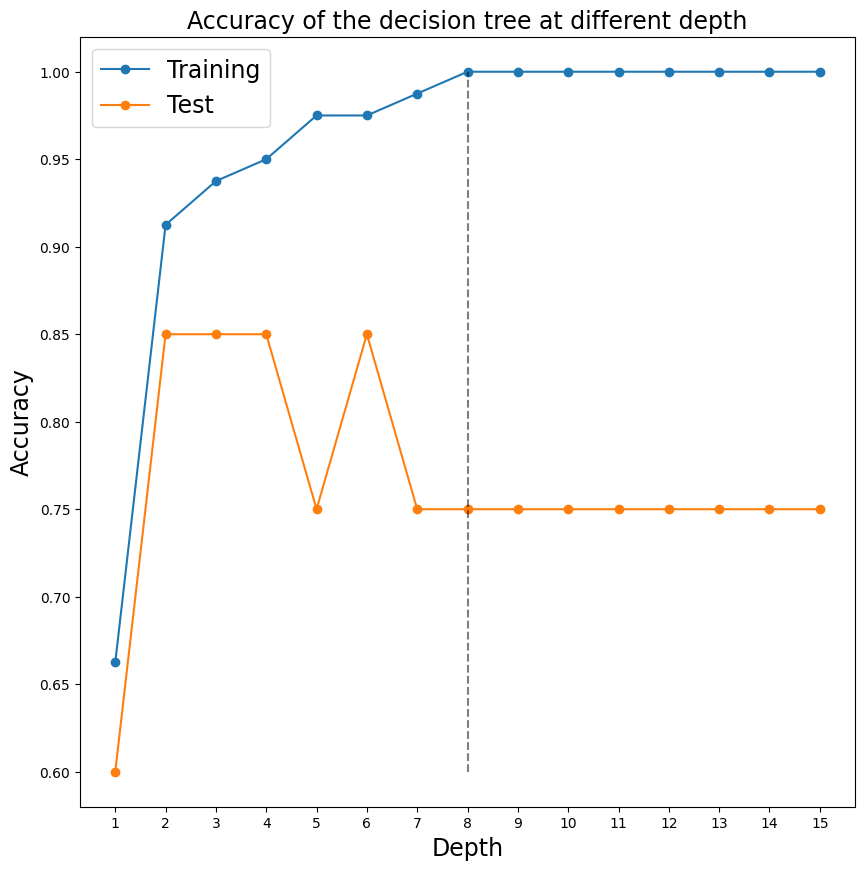

In [ ]:
import numpy as np

## max_depth will be set upto 15 ##
depth = 15

clfs = []
train_accuracy = []
testing_accuracy = []

## Train decision tree classifiers with max_depth set to 1, 2, 3, ..., 15 ##
for i in range(depth):
    clf = DecisionTreeClassifier(random_state=12, max_depth = i+1)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_accuracy = [clf.score(X_train, y_train) for clf in clfs]
testing_accuracy = [clf.score(X_test, y_test) for clf in clfs]

## Plot of depth vs accuracy ##
plt.figure(figsize = (10,10))
plt.plot(np.arange(1, depth+1, 1), train_accuracy, marker = 'o', label = 'Training')
plt.plot(np.arange(1, depth+1, 1), testing_accuracy, marker = 'o', label = "Test")
plt.plot([8,8], [0.6, 1.0], '--', color = 'black', alpha = 0.5)
plt.xlabel("Depth", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)
plt.title("Accuracy of the decision tree at different depth", fontsize = 17)
plt.xticks(np.arange(1, depth+1, 1))
plt.yticks(np.arange(0.6, 1.05, 0.05))
plt.legend(fontsize = 17)
plt.show()

The above plot shows the maximum accuracy of 85% on test data and 100% on training data. At a depth of 8, the model undergoes saturation. This is the condition when all the training samples in the leaf node are pure.

When we first trained a decision tree in the above section, we had obtained a test accuracy of 75%. This corresponds to the max_depth of 8 in the above plot. So when we set max_depth to default, sklearn's DecisionTreeClassifier returns a fully grown overfitted tree with degraded performance.




### Decision Surface Visualization

We have already seen how the accuracy of a  decision tree changes with the depth. Apart from this, we are interested to how the decision becomes complicated with an increase in depth, and if those complications are good or bad. The complications are bad if they result in overfitting, else good.  For this, the decision surface comes handy. The decision surface allows us to visualize the regions of space that correspond to different classes. We can use decision surface to visualize how decision tree has segmented the total space into regions for different classes.

In this section, we will see how the depth of decision tree influences the decision surface/boundary.


To plot the decision boundary, we will use a function `plot_decision_boundary`.

In [ ]:
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20)
    ax.set_xlabel("x1")
    ax.set_ylabel('x2')
    ax.set_title("max_depth: {}".format(clf.max_depth))

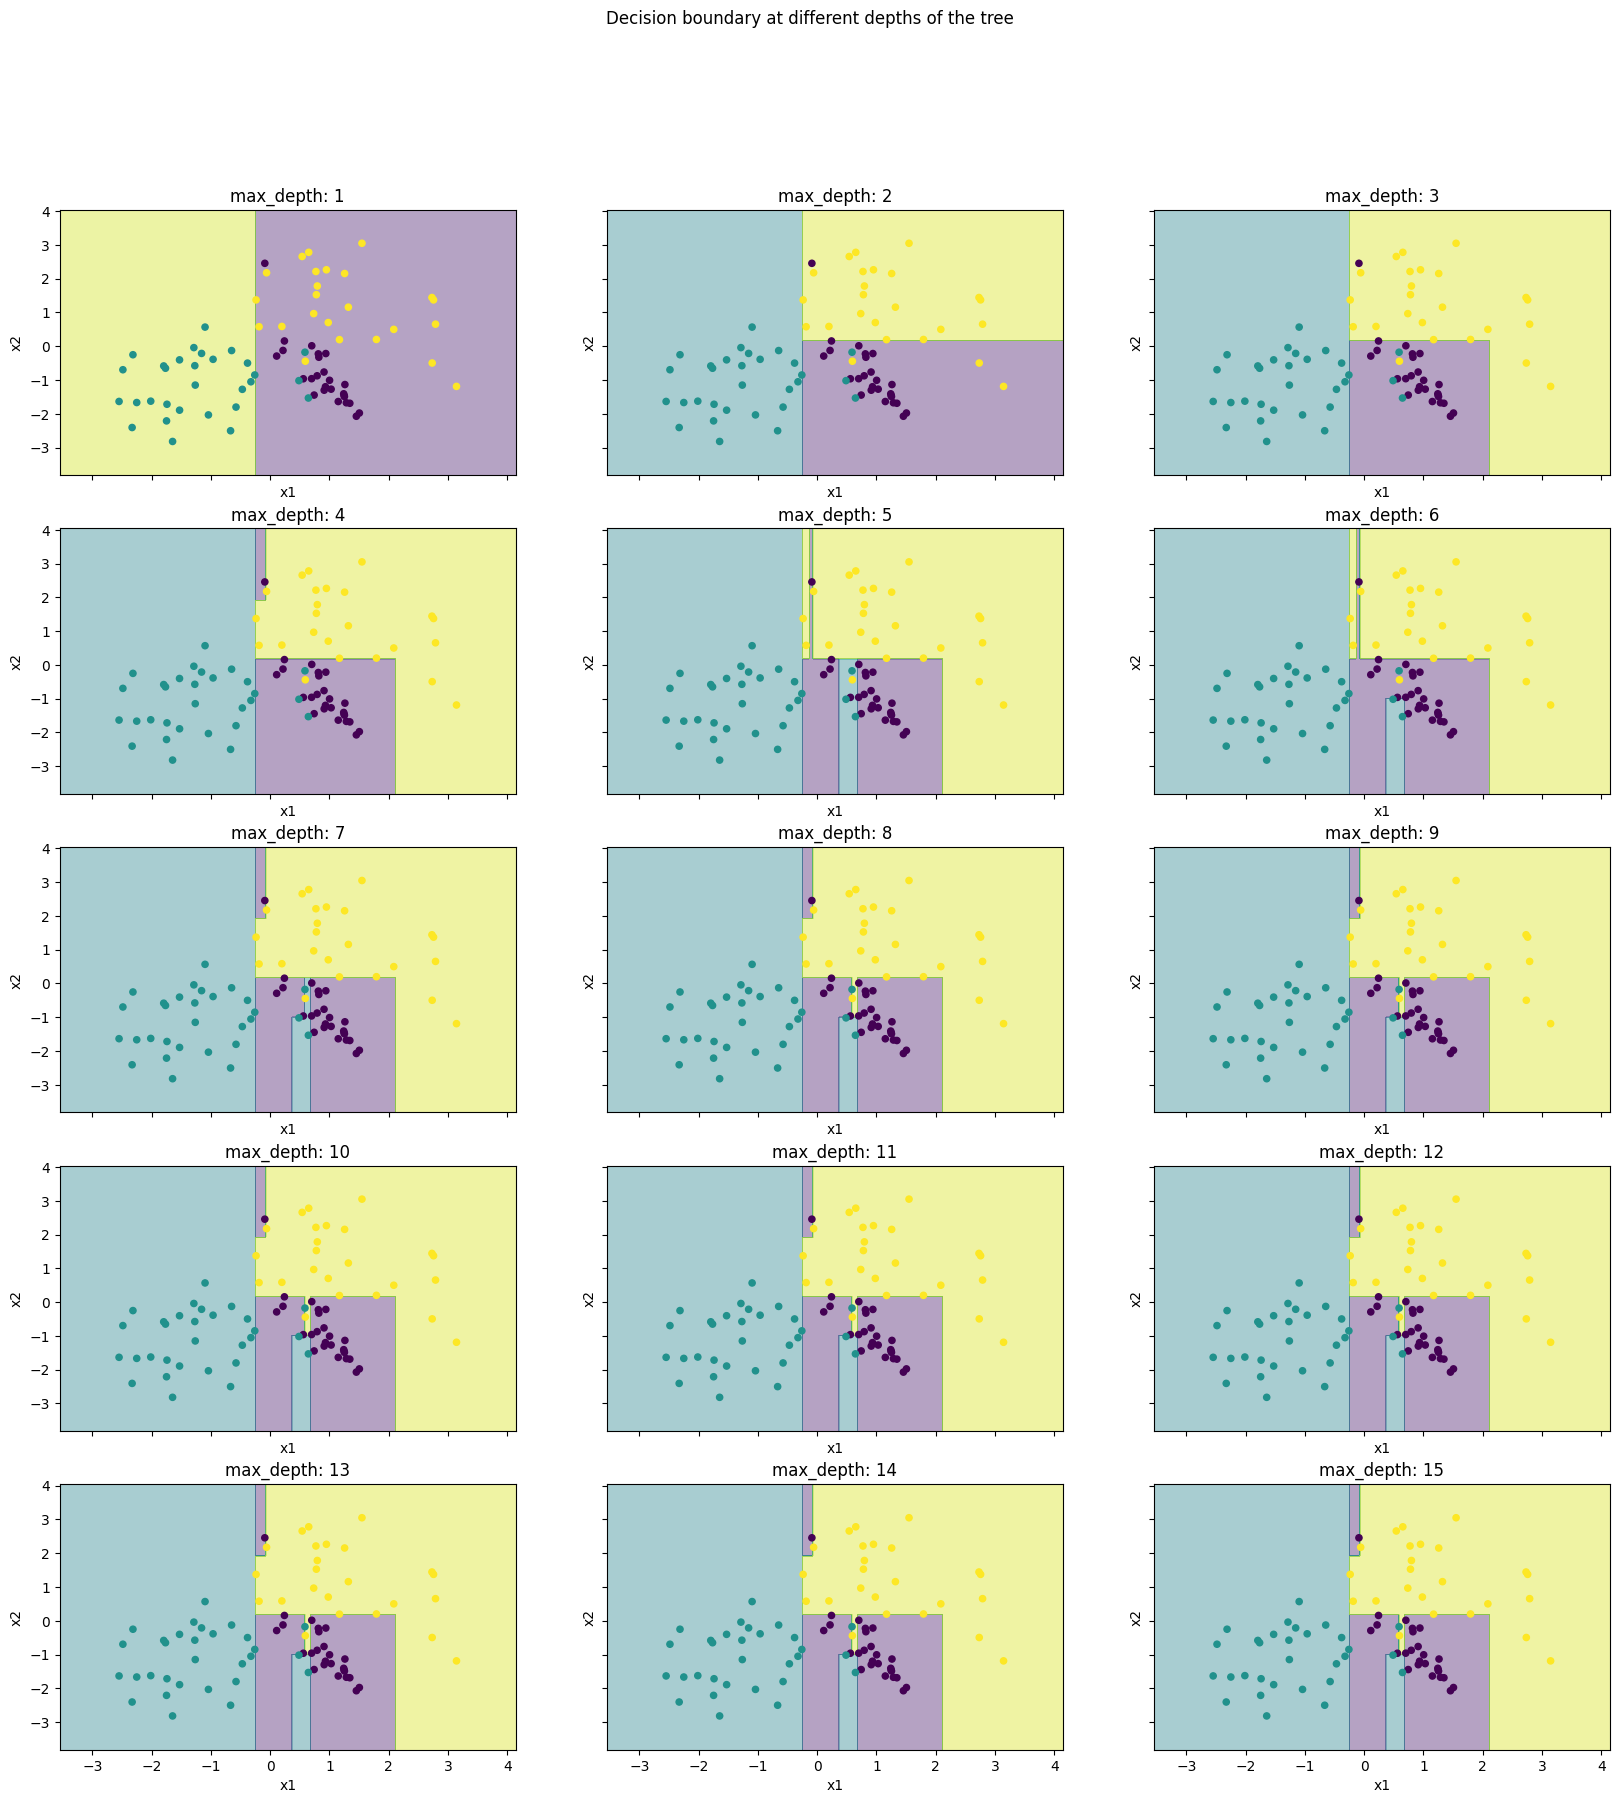

In [ ]:
fig, ax = plt.subplots(int(np.ceil((depth)/3)), 3, sharex = True, sharey = True, figsize = (20,20))
fig.suptitle("Decision boundary at different depths of the tree")
ax = ax.flatten()
ax = list(ax)
for clf, axx  in zip(clfs, ax):
    plot_decision_boundary(clf, X_train, y_train, axx)

The above decision surface shows that with increased depth, the decision surface becomes complex. For example, with a depth of one, we have just two decision surfaces: left and right surface represented by different color. Now with a depth of two, the right decision surface is divided into two separate regions, resulting in three surfaces. The purple surface is narrowed from the right side to let two yellow data points fall in its true region with a depth of three. However, for a depth of 4, we can see a small purple region on the top side. The region is created to label a single purple data point correctly. A similar case is obtained for a depth of 7, where a blue region is created to label a single blue point correctly.


 As the depth increases, the tree focuses too hard on partitioning the surface based on some few samples likely to result in an overfitting/very complex tree.

### Tree Visualization

From the decision surface visualization above, we can see that more complex decision surfaces are formed as the depth increases, resulting in overfitting. Thus, it is necessary to avoid the growth of very large/deep trees. To further understand overfitting and how small sample size at the lower /deeper nodes results in overfitting, let's visualize the tree structure.


In [ ]:
!pip install six -q

Tree Structure 1


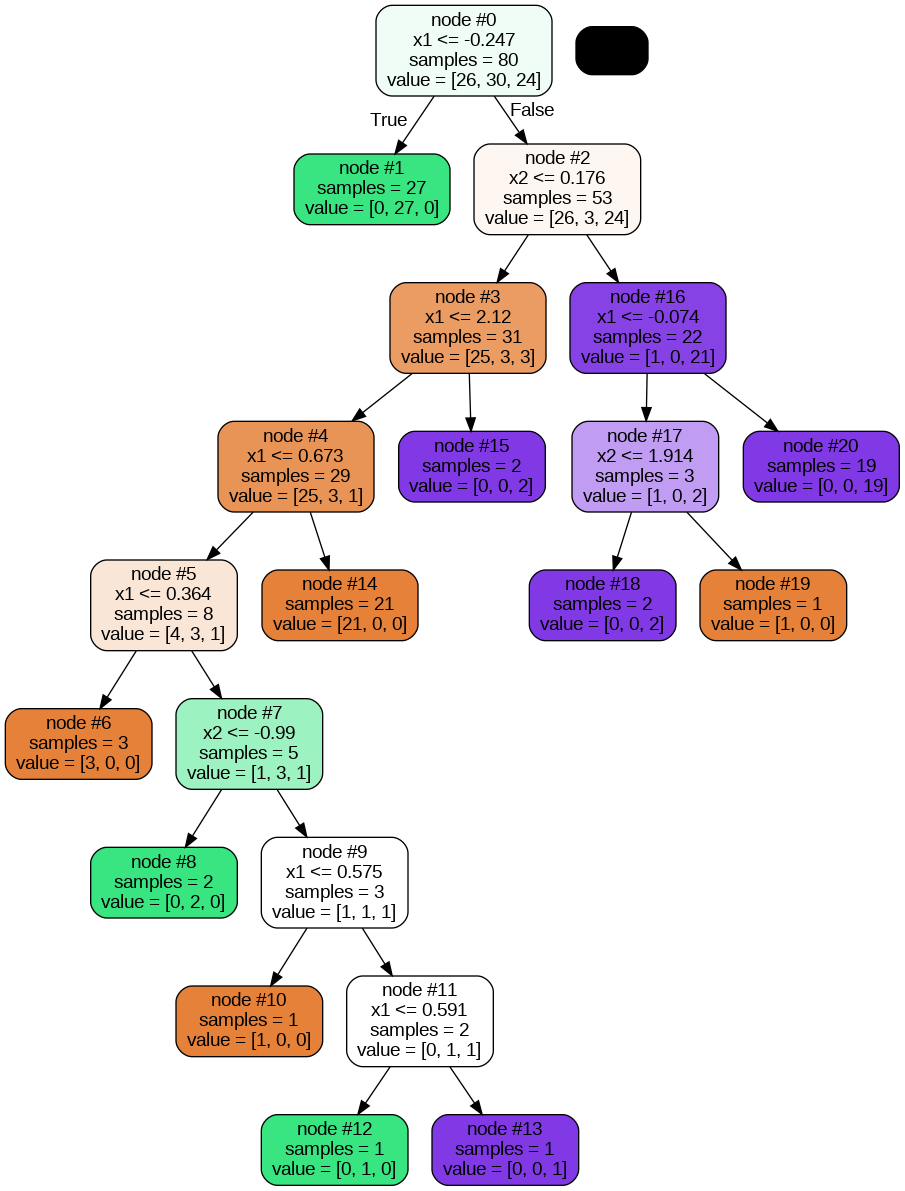

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus


def plot_tree(tree_clf, impurity = False):
    """A function to plot the structure of tree"""
    dot_data = StringIO()
    label = ['class 0','class 1', 'class 2']
    export_graphviz(tree_clf,feature_names = ['x1', 'x2'], impurity = impurity,
                    out_file=dot_data,  filled=True, rounded=True, node_ids = True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))


print("Tree Structure 1")
clf1 = DecisionTreeClassifier(random_state = 12)
clf1.fit(X_train, y_train)
plot_tree(clf1)

A fully grown tree structure is plotted above, which has a depth of 8 (depth of 8 is the utmost depth of tree because the tree saturates after the depth of 8; please refer the plot showing accuracy of decision tree at different depths). From the above tree, we can see that it is an unbalanced tree with the left subtree very deep compared to the right. On further observation, we can see that that the child nodes emanating from node #5 are making the tree very deep. Also, notice the number of samples reaching node #5. The tree extends unnecessarily to partition these small samples (8 samples), increasing the tree's complexity.



Let's locate these 8 data points spanning through node #5 and understand why it leads to a deeper branch. We can do this by applying a series of if-else decisions that lead to this node to locate these 8 data points.

In [ ]:
# Samples passing through node #5 can be computed as
noise_index = (X_train[:,0]>-0.247)&(X_train[:,1]<=0.176)&(X_train[:,0]<=2.12)&(X_train[:,0]<=0.673)
noise = X_train[noise_index]
noise_label = y_train[noise_index]
print("Total number of noise points: {}".format(sum(noise_index)))

Total number of noise points: 8


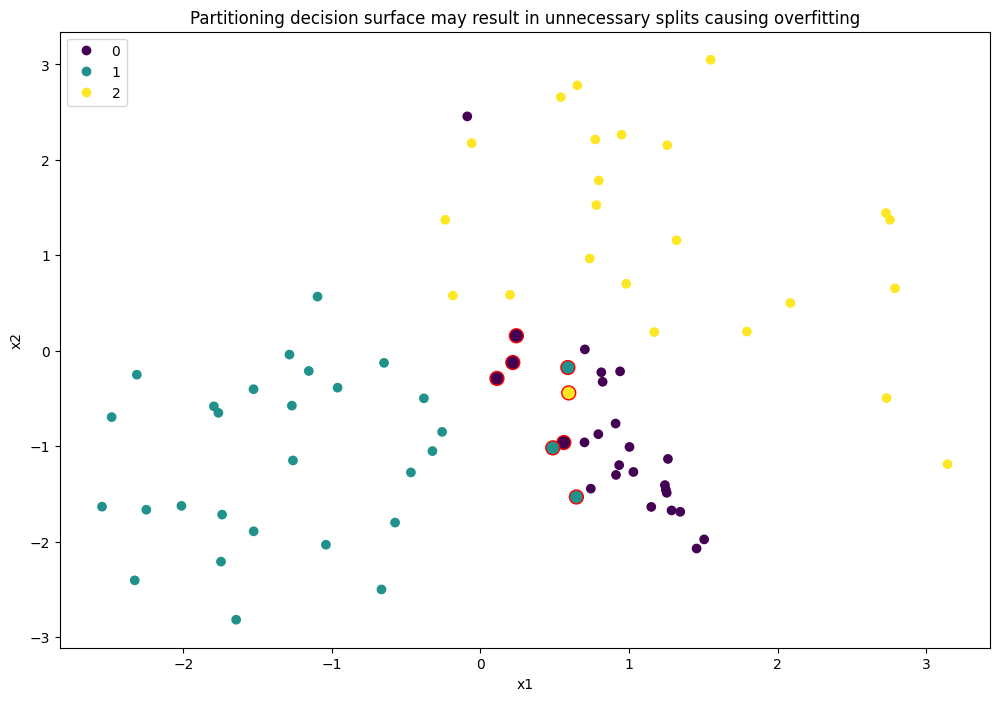

In [ ]:
# Let's visualize those samples
plt.figure(figsize = (12, 8))
scatter = plt.scatter(X_train[:,0],X_train[:, 1], c = y_train)

# Highlight these 8 samples with red circle
scatter = plt.scatter(noise[:,0], noise[:, 1], c= noise_label, s = 100, edgecolors = "red" )
plt.legend(*scatter.legend_elements(), loc = 2)
plt.title("Partitioning decision surface may result in unnecessary splits causing overfitting")
plt.xlabel("x1")
plt.ylabel('x2')
plt.show()



The data samples with a red boundary are the samples reaching node # 5. These samples are from different classes, and as we can see, they fall into the edge of the class boundaries. They can either be legitimate samples or outliers (extreme cases) or noise (from wrong labeling). Thus, trying to perfectly partition/create a decision surface will result in unnecessary splits or complicated decision surfaces, finally leading to overfitting.


## How to prevent overfitting?

From the above examples, we can see that very deep trees overfit. Thus, it is crucial to control the depth or complexity of a tree to prevent overfitting. However, before discussing techniques to prevent overfitting, let us discuss __Occam's razor principle__.

### Occam's razor principle
__Occam's razor principle__ states that if there exist multiple solutions to a problem, the simplest one is usually the best.




In the above plot showing the accuracy of a decision tree for different depths, the maximum test accuracy occurs at four different depths of 2, 3, 4, and 6.

According to Occam's razor principle, setting the depth to 2 yields the simplest and the best solution. But how can we obtain this optimal solution(here, a tree with a depth of 2)? The answer is to use techniques to avoid overfitting.

There are different techniques to avoid overfitting in decision tree. They are:

1. __Early Stopping__

2.  __Pruning__
3.  __Cross Validation__



Let's discuss the first two techniques in brief. The discussion of the third technique is not the focus of this chapter.

1. __Early stopping (Top-down approach)__

 Early stopping prevents the generation of branch/nodes by imposing certain early stopping criteria. So, these criteria are set before training a tree and checked while generating split of a node in a decision tree. For example, check the max_depth limitation before generating a new split. And if the limitation is already reached, further split are stopped. This technique is also called a top-down approach because early stopping occurs in a forward direction(from the root node to the leaf node).

<br>

2. __Pruning (Down up approach)__

 In this technique, a decision tree is grown to its entirety, and the nodes/branches are removed or pruned. The nodes/branch are removed based on the validation dataset. If the removal of node/branch results in a reduction in a validation error, then we keep the change, else revert it. This technique is also called a bottom-up approach because pruning takes place in a backward direction(from the leaf node to the root node).






In this way, we talked about the cause of overfitting in the decision tree, and briefly introduce techniques to avoid overfitting. We will learn about these techniques in more detail in the upcoming chapters.

## Key Takeaways
- Deeper tree tends to overfit.
- Presence of noise causes trees to go unnecessarily deeper.
- Occam’s razor principle: If there exist multiple solutions to a problem, the simplest one is usually the best.
- Early stopping and pruning are two techniques to prevent overfitting in the decision tree.


## Additional Resources


* Theory: Overfitting in decision tree

 * Pang-Ning Tan, Michael Steinbach, Anuj Karpatne, Vipin Kumar, [Introduction to Data Mining](https://www-users.cs.umn.edu/~kumar001/dmbook/firsted.php), 1st Edition
   * Check unit 4.4.1 and 4.4.2 to understand reason for overfitting in decision tree.




